In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:

test_images.shape
len(test_labels)

10000

### Preprocess the data

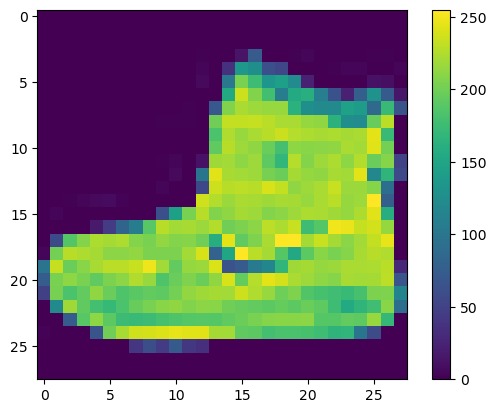

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model

train_images = train_images / 255.0
test_images = test_images / 255.0

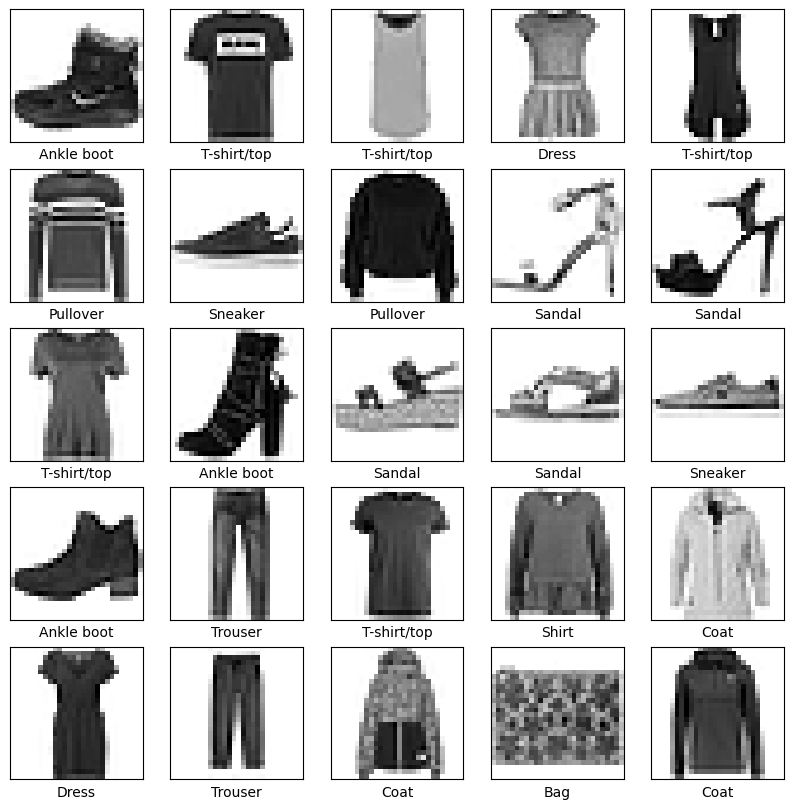

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Model

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
    tf.keras.layers.Dense(128, activation='relu'),  # The first Dense layer has 128 nodes (or neurons).
    tf.keras.layers.Dense(10) # layer returns a logits array with length of 10
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Training the model

In [15]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30


2025-04-28 23:26:47.227633: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 683us/step - loss: 0.4952 - accuracy: 0.8261
Epoch 2/30
1875/1875 [==============================] - 1s 595us/step - loss: 0.3765 - accuracy: 0.8637
Epoch 3/30
1875/1875 [==============================] - 1s 574us/step - loss: 0.3386 - accuracy: 0.8766
Epoch 4/30
1875/1875 [==============================] - 1s 616us/step - loss: 0.3130 - accuracy: 0.8852
Epoch 5/30
1875/1875 [==============================] - 1s 685us/step - loss: 0.2949 - accuracy: 0.8904
Epoch 6/30
1875/1875 [==============================] - 1s 609us/step - loss: 0.2769 - accuracy: 0.8982
Epoch 7/30
1875/1875 [==============================] - 1s 587us/step - loss: 0.2669 - accuracy: 0.9012
Epoch 8/30
1875/1875 [==============================] - 1s 671us/step - loss: 0.2551 - accuracy: 0.9055
Epoch 9/30
1875/1875 [==============================] - 1s 797us/step - loss: 0.2468 - accuracy: 0.9084
Epoch 10/30
1875/1875 [==============================] - 1s 620us/step - lo

### Evaluate accuracy 

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3841 - accuracy: 0.8906 - 207ms/epoch - 660us/step

Test accuracy: 0.8906000256538391


### Make Predictions

In [17]:

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 412us/step


In [20]:
predictions[0]

array([9.0813998e-19, 3.2456764e-20, 9.9551213e-17, 1.8777552e-16,
       2.2843247e-27, 2.4658915e-08, 7.9815550e-15, 3.6474114e-06,
       6.5060541e-17, 9.9999630e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
# Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify Predictions

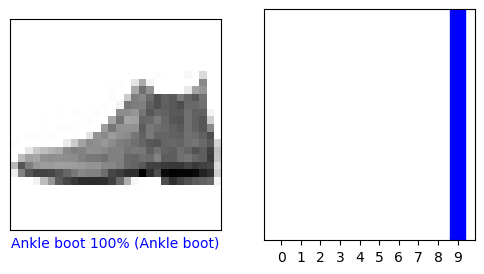

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

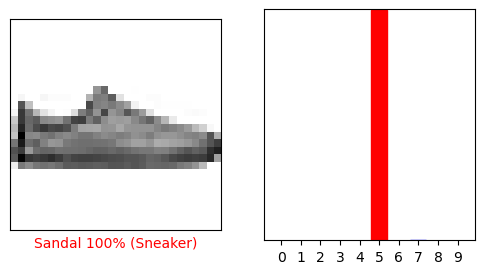

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

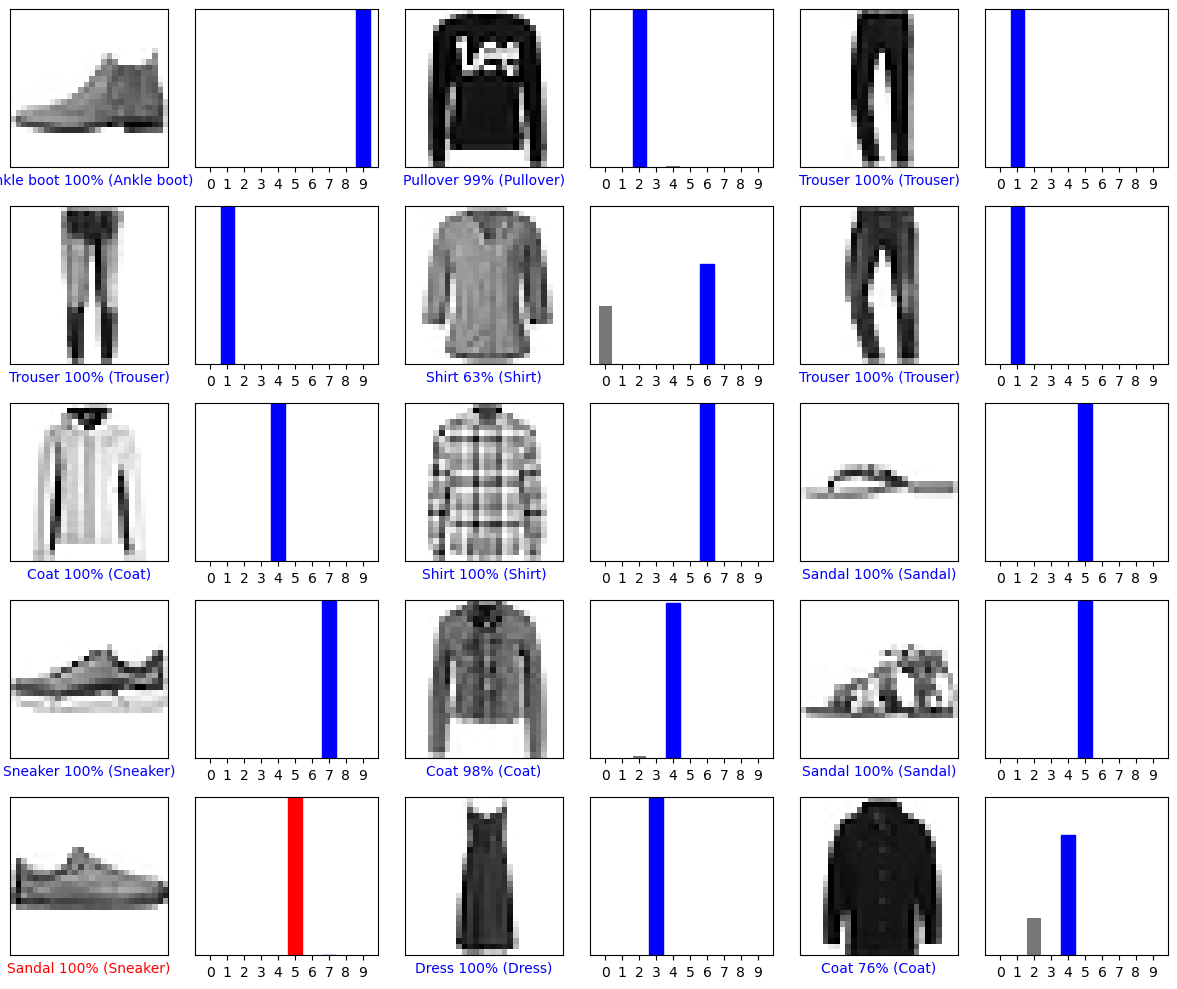

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use trained model

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 54ms/step
[[4.1251653e-04 5.5397123e-19 9.9188870e-01 7.7434739e-11 7.6956307e-03
  3.1762787e-11 3.1586883e-06 7.1804025e-30 4.1653457e-16 2.4483860e-20]]


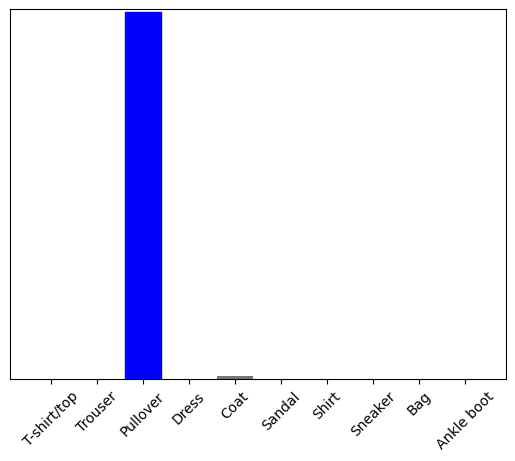

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

# tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2